In [21]:
llema_file_path = "inference_competition_math_results/llemma_competition_math_extracted_answers_2.txt"

mistral_file_path = "inference_competition_math_results/Mistral_Inference_Competition_Dataset.csv"

llama_file_path = "inference_competition_math_results/inference_llama3_competition_math.csv"

qwen_file_path = "inference_competition_math_results/inference_QWEN_competition_math.csv"

In [22]:
import pandas as pd
from datasets import load_dataset, DatasetDict, Dataset
import matplotlib.pyplot as plt
import numpy as np

competition_math_dict = load_dataset("jeggers/competition_math", "original")
test_dataset = competition_math_dict["test"]
test_dataset_df = pd.DataFrame(test_dataset)
test_dataset_df["row_index"] = test_dataset_df.index

def format_llema_inference_competition_math():
    with open(llema_file_path, "r") as file:
        data = [eval(line.strip()) for line in file]
    df = pd.DataFrame(data)
    llema_test_dataset= df.merge(test_dataset_df, left_on='Iteration', right_on='row_index')
    llema_test_dataset["level:type"] = llema_test_dataset["level"] + ": " + llema_test_dataset["type"]

    llema_test_dataset["llema_is_correct"] =  (llema_test_dataset["Final Solution"] == llema_test_dataset["extracted_solution"])

    llema_test_dataset = llema_test_dataset.rename(columns={"Final Solution": "llema_solution"})

    llema_3_results = llema_test_dataset[["row_index", "level", "type", "llema_is_correct", "llema_solution"]]
    return llema_3_results

def format_mistral_inference_competition_math():
    df = pd.read_csv(mistral_file_path)
    mistral_test_dataset= df.merge(test_dataset_df, left_on='row_index', right_on='row_index')
    mistral_test_dataset["mistral_is_correct"] = (mistral_test_dataset["Run_1"] == mistral_test_dataset["extracted_solution"])
    mistral_test_dataset["level:type"] = mistral_test_dataset["level"] + ": " + mistral_test_dataset["type"]

    mistral_test_dataset = mistral_test_dataset.rename(columns={"Run_1": "mistral_solution"})

    mistral_results = mistral_test_dataset[["row_index", "level", "type", "mistral_is_correct", "mistral_solution"]]
    return mistral_results    

def format_llama_inference_competition_math():
    df = pd.read_csv(llama_file_path)
    llama3_test_dataset= df.merge(test_dataset_df, left_on='row_index', right_on='row_index')
    llama3_test_dataset["llama3_is_correct"] = (llama3_test_dataset["Run_1"] == llama3_test_dataset["extracted_solution"])
    llama3_test_dataset["level:type"] = llama3_test_dataset["level"] + ": " + llama3_test_dataset["type"]

    llama3_test_dataset = llama3_test_dataset.rename(columns={"Run_1": "llama_solution"})

    llama3_results = llama3_test_dataset[["row_index", "level", "type", "llama3_is_correct", "llama_solution"]]
    return llama3_results

def format_qwen_inference_competition_math():
    df = pd.read_csv(qwen_file_path)

    qwen_test_dataset= df.merge(test_dataset_df, left_on='row_index', right_on='row_index')
    qwen_test_dataset["qwen_is_correct"] = (qwen_test_dataset["Run_1"] == qwen_test_dataset["extracted_solution"])
    qwen_test_dataset["level:type"] = qwen_test_dataset["level"] + ": " + qwen_test_dataset["type"]

    qwen_test_dataset = qwen_test_dataset.rename(columns={"Run_1": "qwen_solution"})

    qwen_results = qwen_test_dataset[["row_index", "level", "type", "level:type", "qwen_is_correct", "qwen_solution"]]
    return qwen_results

In [23]:
llama3_results = format_llama_inference_competition_math()
llema_results = format_llema_inference_competition_math()
qwen_results = format_qwen_inference_competition_math()
mistral_results = format_mistral_inference_competition_math()

# Check where all the answers correct column is True
# i.e. all models got the answer correct
all_results = ((llama3_results.merge(llema_results)).merge(qwen_results)).merge(mistral_results)
all_results["all_correct"] = (all_results["llama3_is_correct"] == True) & (all_results["llema_is_correct"] == True) & (all_results["qwen_is_correct"] == True) & (all_results["mistral_is_correct"]==True)

all_results["all_incorrect"] = (all_results["llama3_is_correct"] == False) & (all_results["llema_is_correct"] == False) & (all_results["qwen_is_correct"] == False) & (all_results["mistral_is_correct"]==False)

all_results["at_least_3_correct"] = (
    all_results[["llama3_is_correct", "llema_is_correct", "qwen_is_correct", "mistral_is_correct"]]
    .sum(axis=1) >= 3
)
all_results["at_least_2_correct"] = (
    all_results[["llama3_is_correct", "llema_is_correct", "qwen_is_correct", "mistral_is_correct"]]
    .sum(axis=1) >= 2
)

all_results["at_least_1_correct"] = (
    all_results[["llama3_is_correct", "llema_is_correct", "qwen_is_correct", "mistral_is_correct"]]
    .sum(axis=1) >= 1
)


# Check wehere all answers solution column have the same answer
# i.e. all models got the same answer
all_results["all_agree"] = (
    (all_results["llema_solution"] == all_results["llama_solution"]) &
    (all_results["qwen_solution"] == all_results["llama_solution"]) &
    (all_results["mistral_solution"] == all_results["llama_solution"]) &
    (all_results["llema_solution"] != "Error Parsing Response")
)

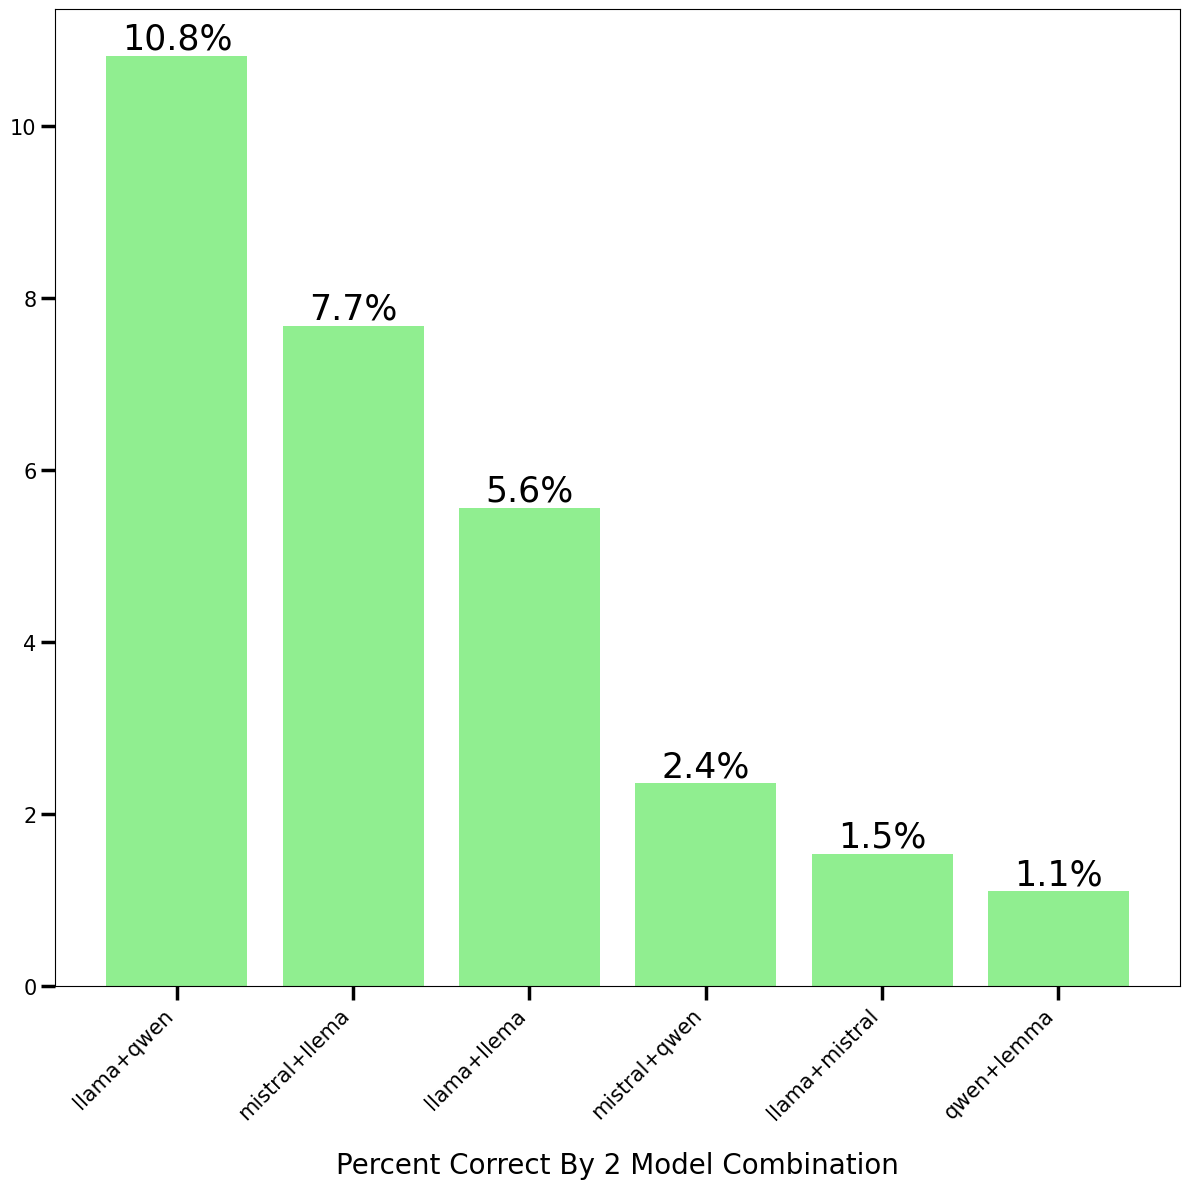

In [24]:
'''
Llama + Mistral
Llama + Qwen
Llama + Llema
Mistral + Qwen
Mistral + Llema
Qwen + Llema
'''
llamaplusmistral = all_results[(all_results["llama3_is_correct"] == True) & (all_results["mistral_is_correct"] == True)]


llamaplusqwen = all_results[(all_results["llama3_is_correct"] == True) & (all_results["qwen_is_correct"] == True)]


llamaplusllema = all_results[(all_results["llama3_is_correct"] == True) & (all_results["llema_is_correct"] == True)]


mistralplusqwen = all_results[(all_results["mistral_is_correct"] == True) & (all_results["qwen_is_correct"] == True)]


mistralplusllema = all_results[(all_results["mistral_is_correct"] == True) & (all_results["llema_is_correct"] == True)]


qwenpluslemma = all_results[(all_results["qwen_is_correct"] == True) & (all_results["llema_is_correct"] == True)]



accuracies = pd.DataFrame(list(zip([len(llamaplusmistral), len(llamaplusqwen), len(llamaplusllema), len(mistralplusqwen), len(qwenpluslemma), len(mistralplusllema)])))
total_sum = len(all_results)
accuracies.index = ["llama+mistral", "llama+qwen", "llama+llema", "mistral+qwen", "mistral+llema", "qwen+lemma"]
accuracies.columns = ["percent"]
accuracies["percent"] = (accuracies["percent"] / total_sum)*100
accuracies = accuracies.sort_values(by=['percent'], ascending=False)

accuracies

fig, ax = plt.subplots(figsize=(12, 12))  

bars = plt.bar(accuracies.index, accuracies["percent"], color = "lightgreen")

ax.bar_label(bars, fmt="%.1f%%", label_type='edge', fontsize=25) 

ax.set_xlabel("Percent Correct By 2 Model Combination", labelpad=20)

ax.tick_params(axis='both', which='major', labelsize=15, width=2.5, length=10)


ax.set_xlabel('Percent Correct By 2 Model Combination', fontsize=20)

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

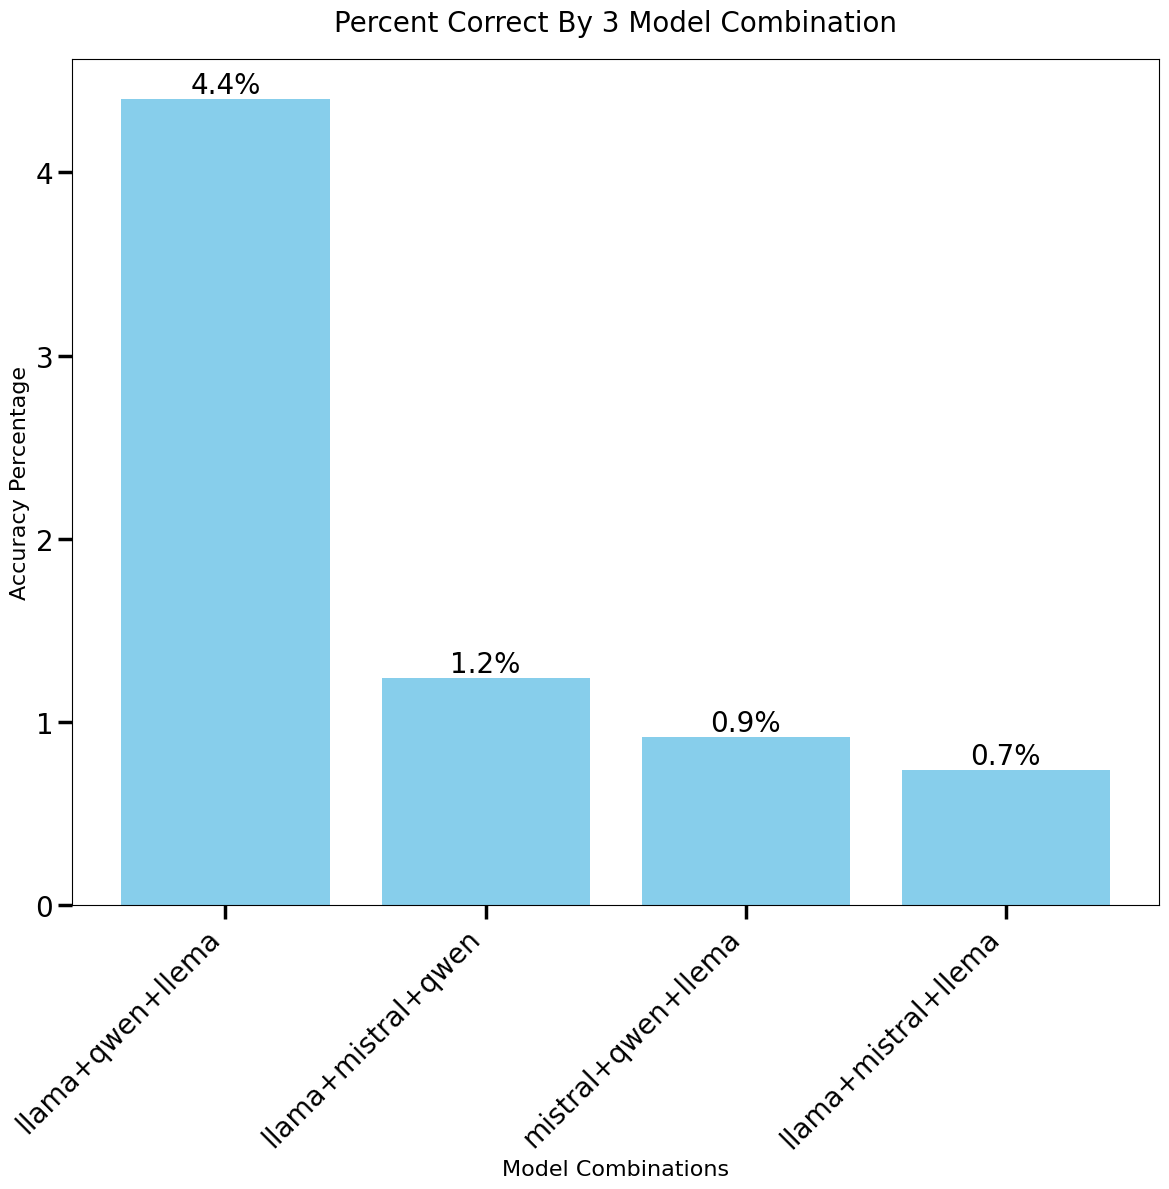

In [26]:
# Trigram combinations: 
llama_mistral_qwen = all_results[
    (all_results["llama3_is_correct"] == True) & 
    (all_results["mistral_is_correct"] == True) & 
    (all_results["qwen_is_correct"] == True)
]

llama_mistral_llema = all_results[
    (all_results["llama3_is_correct"] == True) & 
    (all_results["mistral_is_correct"] == True) & 
    (all_results["llema_is_correct"] == True)
]

llama_qwen_llema = all_results[
    (all_results["llama3_is_correct"] == True) & 
    (all_results["qwen_is_correct"] == True) & 
    (all_results["llema_is_correct"] == True)
]

mistral_qwen_llema = all_results[
    (all_results["mistral_is_correct"] == True) & 
    (all_results["qwen_is_correct"] == True) & 
    (all_results["llema_is_correct"] == True)
]

# Calculate accuracies
accuracies_trigram = pd.DataFrame(
    list(
        zip(
            [len(llama_mistral_qwen), len(llama_mistral_llema), len(llama_qwen_llema), len(mistral_qwen_llema)],
            ["llama+mistral+qwen", "llama+mistral+llema", "llama+qwen+llema", "mistral+qwen+llema"]
        )
    ),
    columns=["correct_count", "combination"]
)

total_sum = len(all_results)
accuracies_trigram["percent"] = (accuracies_trigram["correct_count"] / total_sum) * 100
accuracies_trigram = accuracies_trigram.sort_values(by=['percent'], ascending=False)

# Plot results
fig, ax = plt.subplots(figsize=(12, 12))

bars = plt.bar(accuracies_trigram["combination"], accuracies_trigram["percent"], color="skyblue")

ax.bar_label(bars, fmt="%.1f%%", label_type='edge', fontsize=20)

ax.set_title("Percent Correct By 3 Model Combination", fontsize=20, pad=20)
ax.set_xlabel("Model Combinations", fontsize=16)
ax.set_ylabel("Accuracy Percentage", fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=20, width=2.5, length=10)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [69]:
print(len(all_results[all_results["at_least_3_correct"]]))

269


In [70]:
print(len(all_results[all_results["at_least_2_correct"]]))

819


In [71]:
print(len(all_results[all_results["at_least_1_correct"]]))

2215


In [72]:
print(len(all_results))

5000


Text(0.5, 0, 'Perent Correct By Each Model')

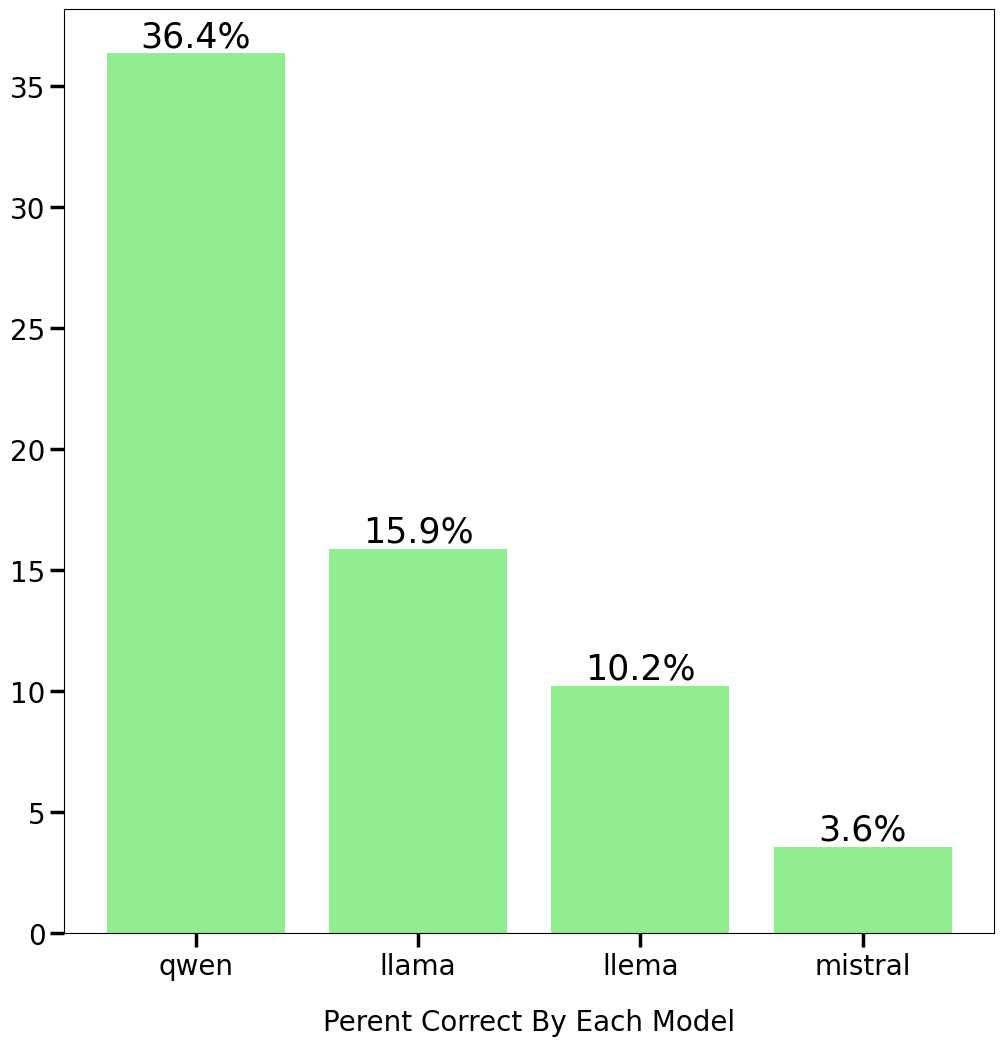

In [45]:
llama = all_results[all_results["llama3_is_correct"] == True]
llema = all_results[all_results["llema_is_correct"] == True]
mistral = all_results[all_results["mistral_is_correct"] == True]
qwen = all_results[all_results["qwen_is_correct"] == True]

accuracies = pd.DataFrame(list(zip([len(llama), len(llema), len(mistral), len(mixed_qwen)])))
total_sum = len(all_results)
accuracies.index = ["llama", "llema", "mistral", "qwen"]
accuracies.columns = ["percent"]
accuracies["percent"] = (accuracies["percent"] / total_sum)*100
accuracies = accuracies.sort_values(by=['percent'], ascending=False)

accuracies

fig, ax = plt.subplots(figsize=(12, 12))  

bars = plt.bar(accuracies.index, accuracies["percent"], color = "lightgreen")

ax.bar_label(bars, fmt="%.1f%%", label_type='edge', fontsize=25) 

ax.set_xlabel("Percent Correct By Each Model", labelpad=20)

ax.tick_params(axis='both', which='major', labelsize=20, width=2.5, length=10)

ax.set_xlabel('Perent Correct By Each Model', fontsize=20)



Text(0.5, 0, 'Percent Correct Excluding all correct and all incorrect')

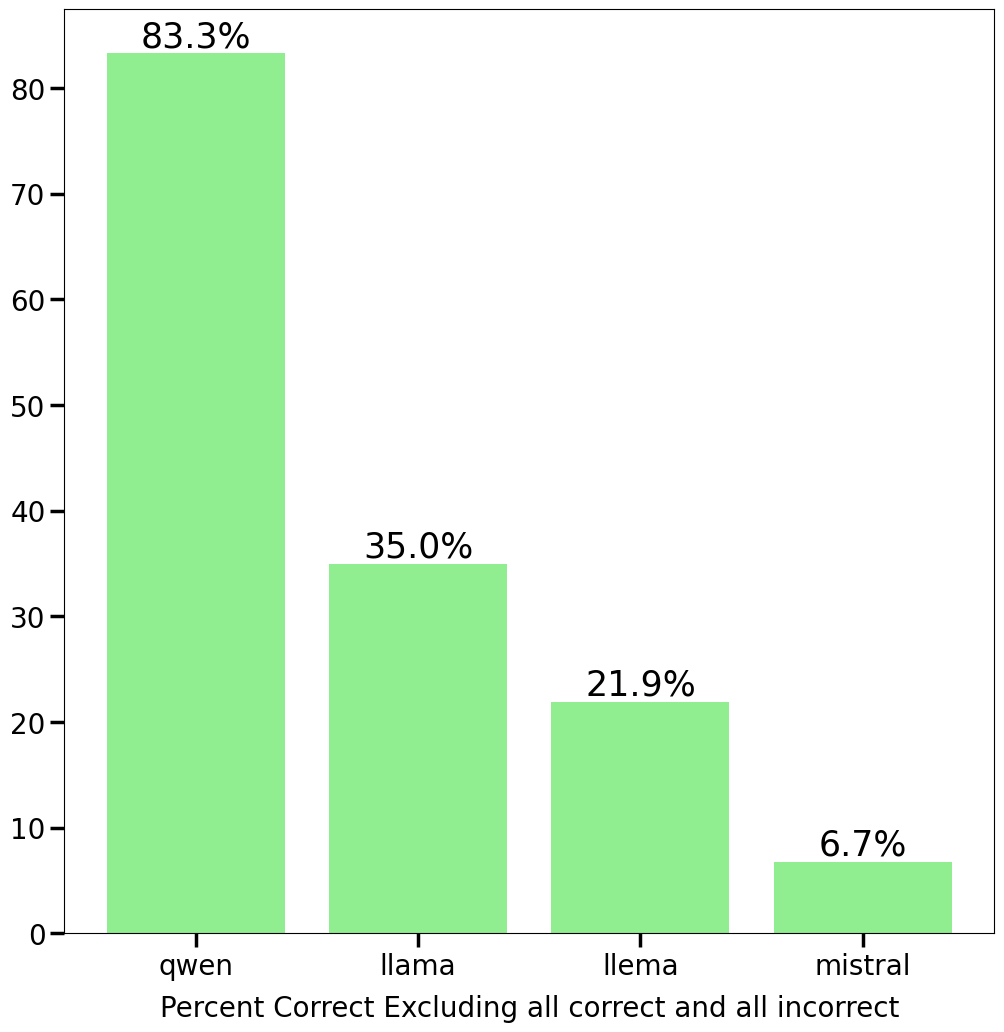

In [51]:
mixed_llama = all_results[(all_results["llama3_is_correct"] == True) & (all_results["all_correct"] == False) & (all_results["all_incorrect"]==False)]
mixed_llema = all_results[(all_results["llema_is_correct"] == True) & (all_results["all_correct"] == False) & (all_results["all_incorrect"]==False)]
mixed_mistral = all_results[(all_results["mistral_is_correct"] == True) & (all_results["all_correct"] == False) & (all_results["all_incorrect"]==False)]
mixed_qwen = all_results[(all_results["qwen_is_correct"] == True) & (all_results["all_correct"] == False) & (all_results["all_incorrect"]==False)]

mixed_accuracies = pd.DataFrame(list(zip([len(mixed_llama), len(mixed_llema), len(mixed_mistral), len(mixed_qwen)])))
total_sum = len(all_results[(all_results["all_correct"] == False) & (all_results["all_incorrect"]==False)])
mixed_accuracies.index = ["llama", "llema", "mistral", "qwen"]
mixed_accuracies.columns = ["percent"]
mixed_accuracies["percent"] = (mixed_accuracies["percent"] / total_sum)*100
mixed_accuracies = mixed_accuracies.sort_values(by=["percent"], ascending=False)

fig, ax = plt.subplots(figsize=(12, 12))  

bars = plt.bar(mixed_accuracies.index, mixed_accuracies["percent"], color="lightgreen")


ax.bar_label(bars, fmt="%.1f%%", label_type='edge', fontsize=25) 

ax.set_xlabel("Percent Correct By Each Model", labelpad=20)

ax.tick_params(axis='both', which='major', labelsize=20, width=2.5, length=10)

ax.set_xlabel('Perent Correct By Each Model', fontsize=20)

ax.set_xlabel("Percent Correct Excluding all correct and all incorrect", labelpad=10)

In [6]:
#all_models_questions_got_wrong_competition_math = all_results[all_results#["all_incorrect"]==True]
#all_models_questions_got_wrong_competition_math.to_csv("all_models_questions_got_wrong_competition_math.csv")

In [26]:
all_results["at_least_3_correct"].value_counts()

at_least_3_correct
False    4731
True      269
Name: count, dtype: int64

In [76]:
def give_ensemble_model_atleast1_piechart():

    ensemble_model_atleast1_correct = pd.DataFrame( all_results['at_least_1_correct'].value_counts() )

    labels = ['Other', 'At least 1 Model Correct']
    sizes = [ ensemble_model_atleast1_correct['count'].iloc[0],ensemble_model_atleast1_correct['count'].iloc[1]]
    colors = ['#ff9999', '#66b3ff']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That At Least 1 Model Gave Correct Answers')

    return plt

def give_ensemble_model_atleast2_piechart():

    ensemble_model_atleast2_correct = pd.DataFrame( all_results['at_least_2_correct'].value_counts() )

    labels = ['Other', 'At least 2 Model Correct']
    sizes = [ ensemble_model_atleast2_correct['count'].iloc[0],ensemble_model_atleast2_correct['count'].iloc[1]]
    colors = ['#ff9999', '#66b3ff']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That At Least 2 Models Gave Correct Answers')

    return plt


def give_ensemble_model_atleast3_piechart():

    ensemble_model_atleast3_correct = pd.DataFrame( all_results['at_least_3_correct'].value_counts() )

    labels = ['Other', 'At least 3 Model Correct']
    sizes = [ ensemble_model_atleast3_correct['count'].iloc[0],ensemble_model_atleast3_correct['count'].iloc[1]]
    colors = ['#ff9999', '#66b3ff']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That At Least 3 Models Gave Correct Answers')

    return plt


def give_ensemble_model_all_incorrect_piechart():

    ensemble_model_all_incorrect = pd.DataFrame( all_results['all_incorrect'].value_counts() )

    labels = ['Other', 'All Incorrect']
    sizes = [ ensemble_model_all_incorrect['count'].iloc[0],ensemble_model_all_incorrect['count'].iloc[1]]
    colors = ['lightgreen', 'red']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That All Models Gave Incorrect Answers')

    return plt




def give_ensemble_model_all_correct_piechart():

    ensemble_model_all_correct = pd.DataFrame( all_results['all_correct'].value_counts() )

    labels = ['Other', 'All Correct']
    sizes = [ ensemble_model_all_correct['count'].iloc[0],ensemble_model_all_correct['count'].iloc[1]]
    colors = ['red', 'lightgreen']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That All Models Gave Correct Answers')

    return plt


def give_ensemble_model_all_agree_piechart():

    ensemble_model_all_agree = pd.DataFrame(all_results["all_agree"].value_counts())

    labels = ['Agree', 'Disagree']
    sizes = [ ensemble_model_all_agree['count'].iloc[0],ensemble_model_all_agree['count'].iloc[1]]
    colors = ['#ff9999', '#66b3ff']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That All Models Agreed on vs Disagreed on Answer')

    return plt

def get_competition_math_level_type_distribution():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]

    percent_each_leveltype = percent_each_leveltype.sort_values(by=['Level:Type'], ascending=False)
    percent_each_leveltype

    fig, ax = plt.subplots(figsize=(12, 7))  

    bars = plt.barh(percent_each_leveltype.index, percent_each_leveltype["Percent of Level:Type in Dataset"], color = "skyblue")

    ax.bar_label(bars, fmt="%.1f%%", label_type='edge', fontsize=10) 

    ax.set_xlabel("Percent of Level:Type", labelpad=10)

    return plt


def get_competition_math_individual_breakdown_all_correct():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]
    
    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["all_correct"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["all_correct"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))
        
        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Correct by All Models', 'Total Correct', 'Total Correct Raw', 'Question #s Incorrect by at least 1 Model',
    'Total Incorrect']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Correct Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Correct Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Correct Raw"])
    return individal_question_breakdown


def get_competition_math_individual_breakdown_all_incorrect():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]
    
    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["all_incorrect"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["all_incorrect"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))
        
        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Incorrect by All Models', 'Total Incorrect', 'Total Incorrect Raw', 'Question #s Correct by at least 1 Model',
    'Total Correct']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Incorrect Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Incorrect Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Incorrect Raw"])
    return individal_question_breakdown


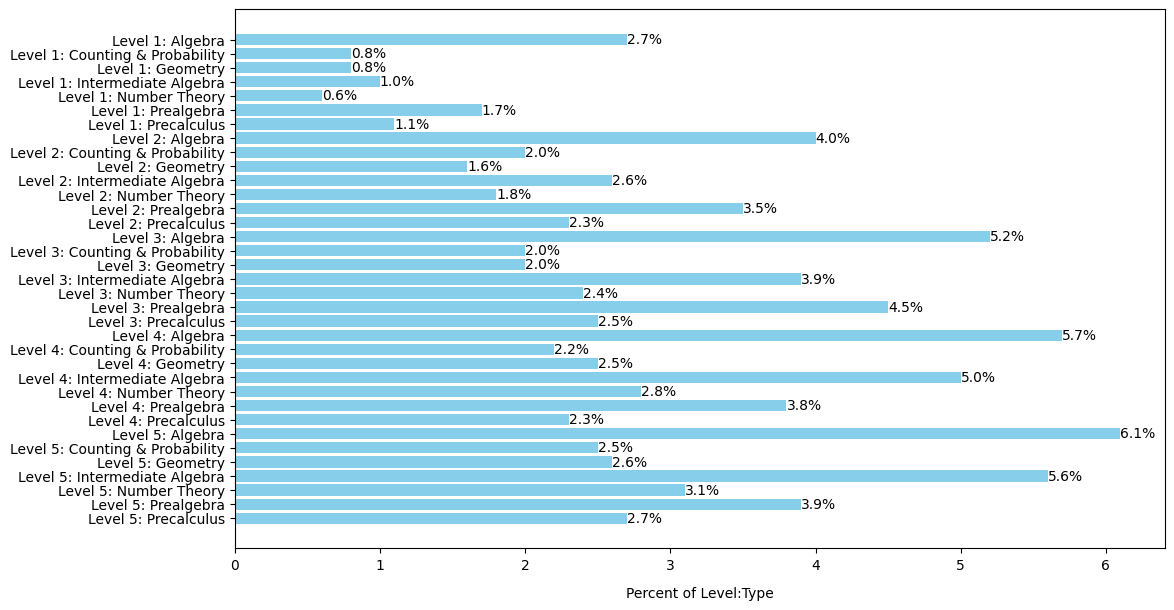

In [8]:
get_competition_math_level_type_distribution().show()

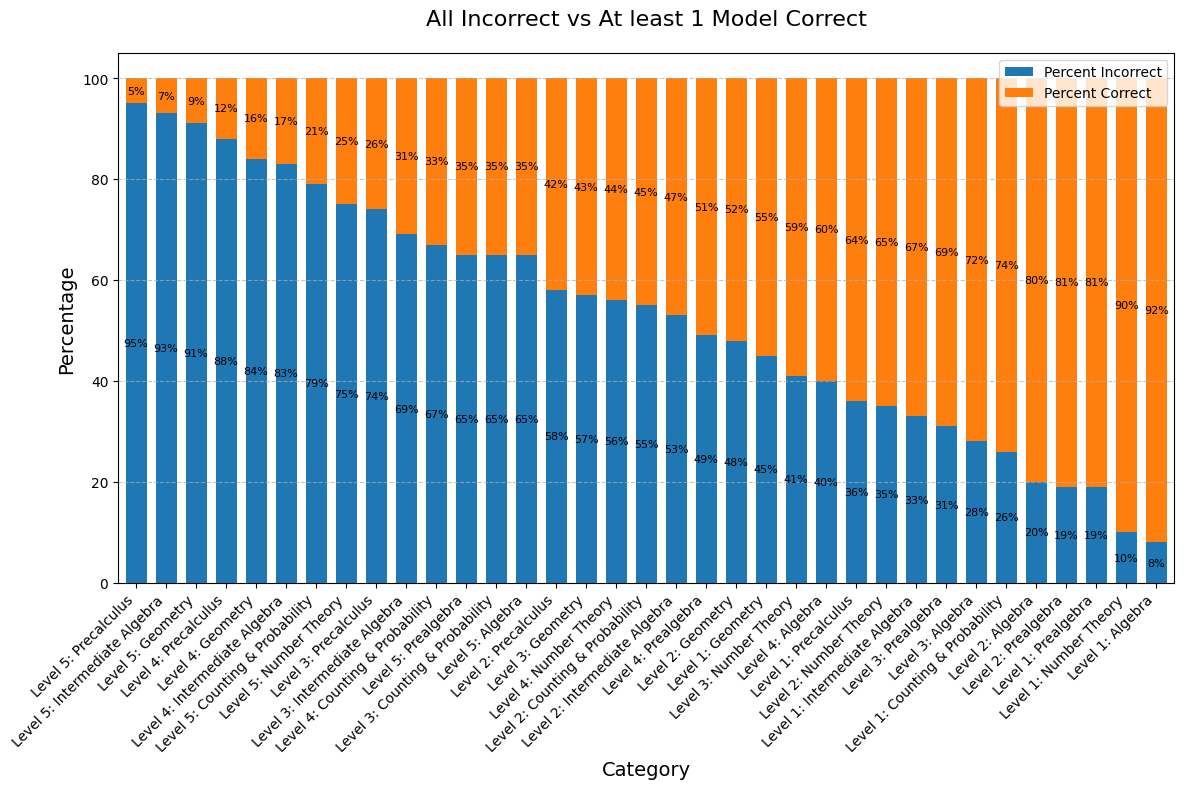

In [69]:
import matplotlib.pyplot as plt

df = get_competition_math_individual_breakdown_all_incorrect()

percent_incorrect = [float(p.strip('%')) for p in df["Total Incorrect"]]
percent_correct = [float(p.strip('%')) for p in df["Total Correct"]]
df["Percent Correct"] = percent_correct
df["Percent Incorrect"] = percent_incorrect
df = df[["Level:Type", "Percent Incorrect", "Percent Correct"]]

# Increase figure size and adjust spacing
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust width and height

# Plot stacked bar chart
df.plot.bar(x="Level:Type", stacked=True, ax=ax, width=0.7)  # Adjust width for spacing

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add bar labels for percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', size=8)

# Adjust title and axis labels for better readability
ax.set_title("All Incorrect vs At least 1 Model Correct", fontsize=16, pad=20)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_xlabel("Category", fontsize=14)

# Add grid for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()



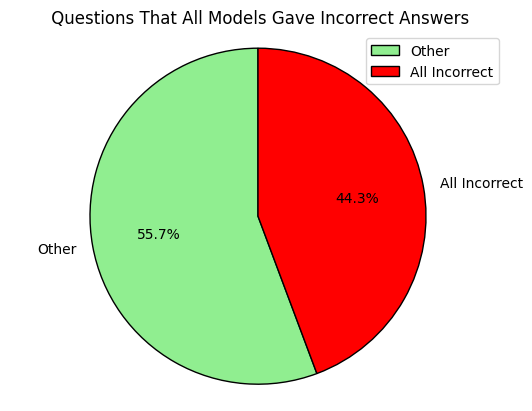

In [48]:
#give_ensemble_model_all_correct_piechart().show()
give_ensemble_model_all_incorrect_piechart().show()
#give_ensemble_model_all_agree_piechart().show()

#give_ensemble_model_atleast3_piechart().show()

In [98]:
get_competition_math_individual_breakdown_all_incorrect()

,Level:Type,Question #s Incorrect by All Models,Total Incorrect,Question #s Correct by at least 1 Model,Total Correct,Percent of Level:Type in Dataset
31,Level 5: Precalculus,"4458, 4462, 4470, 4473, 4483, 4485, 4486, 4490...",95%,"4455, 4465, 4673, 4919, 4925, 4959",5%,2.7
15,Level 5: Intermediate Algebra,"2140, 2146, 2149, 2155, 2158, 2169, 2171, 2177...",93%,"2167, 2224, 2226, 2280, 2309, 2416, 2440, 2490...",7%,5.6
11,Level 5: Geometry,"1663, 1665, 1666, 1667, 1669, 1671, 1676, 1677...",91%,"1705, 1713, 1748, 1754, 1759, 1766, 1779, 1996...",9%,2.6
30,Level 4: Precalculus,"4457, 4463, 4464, 4469, 4471, 4472, 4474, 4475...",88%,"4454, 4513, 4640, 4646, 4653, 4742, 4763, 4780...",12%,2.3
12,Level 4: Geometry,"1664, 1672, 1674, 1678, 1682, 1683, 1686, 1688...",84%,"1675, 1700, 1761, 1797, 1846, 1854, 1858, 1874...",16%,2.5
17,Level 4: Intermediate Algebra,"2142, 2144, 2151, 2152, 2165, 2170, 2174, 2179...",83%,"2194, 2205, 2241, 2307, 2350, 2380, 2435, 2438...",17%,5.0
8,Level 5: Counting & Probability,"1190, 1192, 1194, 1195, 1199, 1200, 1202, 1203...",79%,"1205, 1235, 1246, 1267, 1328, 1336, 1387, 1395...",21%,2.5
22,Level 5: Number Theory,"3046, 3047, 3050, 3061, 3062, 3064, 3067, 3078...",75%,"3056, 3070, 3071, 3075, 3090, 3105, 3116, 3130...",25%,3.1
33,Level 3: Precalculus,"4459, 4460, 4461, 4466, 4467, 4468, 4476, 4493...",74%,"4487, 4508, 4538, 4555, 4582, 4589, 4594, 4609...",26%,2.5
18,Level 3: Intermediate Algebra,"2145, 2147, 2148, 2150, 2163, 2166, 2175, 2178...",69%,"2143, 2154, 2162, 2164, 2176, 2190, 2216, 2220...",31%,3.9


In [19]:
all_results[all_results["row_index"] == 3056][["llama_solution", "llema_solution", "qwen_solution", "mistral_solution"]]

,llama_solution,llema_solution,qwen_solution,mistral_solution
3056,6,None,12,10000000000000000


In [20]:
print(list(test_dataset_df[test_dataset_df["row_index"] == 3056]["problem"])[0])

test_dataset_df[test_dataset_df["row_index"] == 3056]

What is the smallest positive integer $n$ such that, out of the $n$ unit fractions $\frac{1}{k}$ where $1 \le k \le n$, exactly half of the fractions give a terminating decimal?


,problem,level,type,solution,extracted_solution,row_index,Level:Type
3056,What is the smallest positive integer $n$ such...,Level 5,Number Theory,If $\frac{1}{k}$ has a terminating decimal rep...,12,3056,Level 5: Number Theory


In [78]:

def get_competition_math_individual_breakdown_3correct():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]
    
    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["at_least_3_correct"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["at_least_3_correct"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))
        
        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Correct by 3 Models', 'Total Correct', 'Total Correct Raw', 'Question #s Incorrect by at least 1 Model',
    'Total Incorrect']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Correct Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Correct Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Correct Raw"])
    return individal_question_breakdown

correct3 = get_competition_math_individual_breakdown_3correct()
correct3

,Level:Type,Question #s Correct by 3 Models,Total Correct,Question #s Incorrect by at least 1 Model,Total Incorrect,Percent of Level:Type in Dataset
1,Level 1: Algebra,"1, 100, 112, 118, 149, 154, 179, 212, 236, 287...",31%,"4, 13, 19, 24, 64, 65, 70, 83, 84, 102, 105, 1...",69%,2.7
28,Level 1: Prealgebra,"3594, 3622, 3634, 3652, 3674, 3693, 3748, 3892...",28%,"3591, 3596, 3606, 3607, 3626, 3651, 3653, 3661...",72%,1.7
26,Level 2: Prealgebra,"3665, 3672, 3694, 3696, 3786, 3821, 3882, 3908...",19%,"3584, 3597, 3602, 3605, 3616, 3617, 3619, 3630...",81%,3.5
4,Level 2: Algebra,"12, 22, 42, 72, 202, 204, 206, 227, 237, 252, ...",18%,"5, 16, 41, 44, 67, 76, 79, 82, 86, 94, 96, 101...",82%,4.0
19,Level 1: Intermediate Algebra,"2245, 2371, 2705, 2802, 2818, 2829, 2905, 2965",15%,"2157, 2172, 2186, 2206, 2244, 2258, 2268, 2289...",85%,1.0
23,Level 1: Number Theory,"3051, 3054, 3190, 3211",13%,"3103, 3140, 3150, 3187, 3240, 3245, 3261, 3263...",87%,0.6
5,Level 1: Counting & Probability,"1187, 1300, 1318, 1366, 1473",13%,"1197, 1208, 1223, 1262, 1273, 1280, 1282, 1283...",87%,0.8
14,Level 1: Geometry,"1775, 1778, 1849, 1915",11%,"1741, 1749, 1752, 1753, 1762, 1790, 1815, 1817...",89%,0.8
0,Level 3: Algebra,"31, 145, 247, 290, 320, 340, 344, 405, 409, 45...",9%,"0, 14, 17, 18, 23, 30, 35, 45, 47, 49, 52, 53,...",91%,5.2
34,Level 1: Precalculus,"4627, 4683, 4740, 4747, 4945",9%,"4481, 4484, 4488, 4512, 4520, 4545, 4557, 4560...",91%,1.1


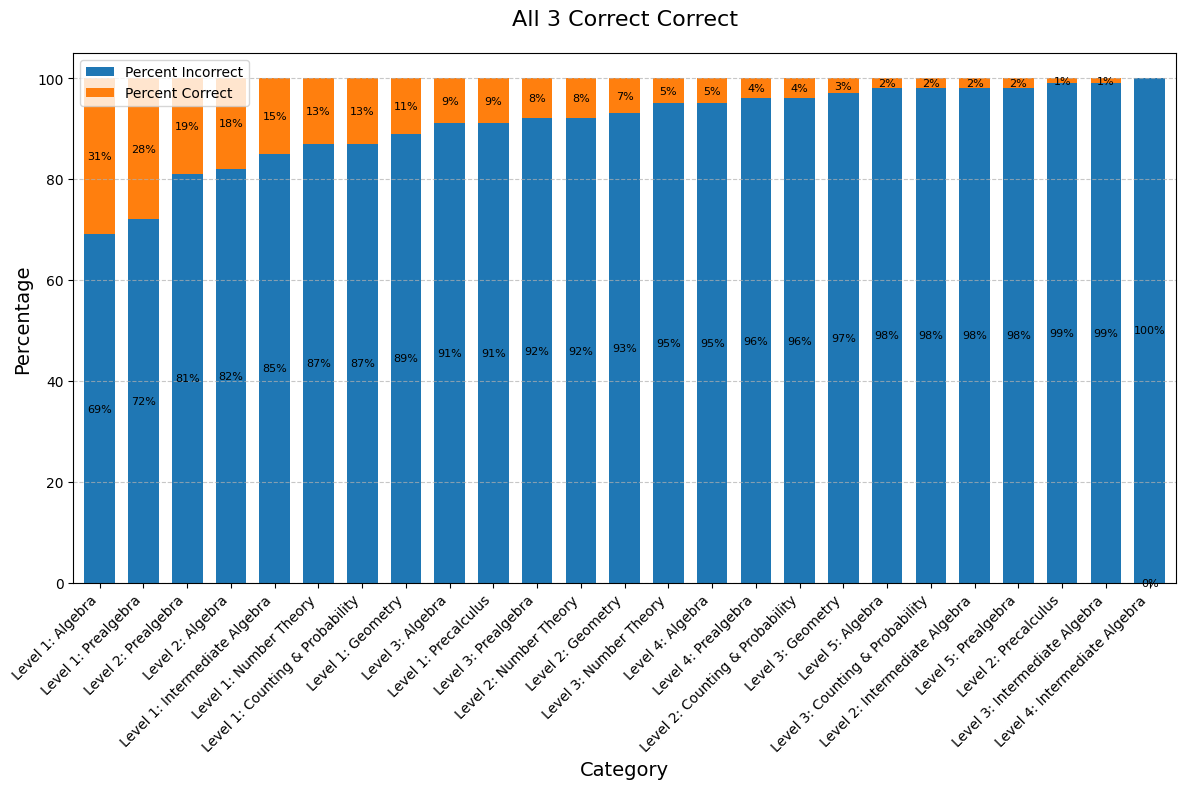

In [79]:
df = correct3
percent_incorrect = [float(p.strip('%')) for p in df["Total Incorrect"]]
percent_correct = [float(p.strip('%')) for p in df["Total Correct"]]
df["Percent Correct"] = percent_correct
df["Percent Incorrect"] = percent_incorrect
df = df[["Level:Type", "Percent Incorrect", "Percent Correct"]]

# Increase figure size and adjust spacing
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust width and height

# Plot stacked bar chart
df.plot.bar(x="Level:Type", stacked=True, ax=ax, width=0.7)  # Adjust width for spacing

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add bar labels for percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', size=8)

# Adjust title and axis labels for better readability
ax.set_title("All 3 Correct Correct", fontsize=16, pad=20)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_xlabel("Category", fontsize=14)

# Add grid for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

In [9]:
def get_competition_math_individual_breakdown_2correct():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]
    
    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["at_least_2_correct"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["at_least_2_correct"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))
        
        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Correct by 3 Models', 'Total Correct', 'Total Correct Raw', 'Question #s Incorrect by at least 1 Model',
    'Total Incorrect']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Correct Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Correct Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Correct Raw"])
    return individal_question_breakdown

correct2 = get_competition_math_individual_breakdown_2correct()
correct2

,Level:Type,Question #s Correct by 3 Models,Total Correct,Question #s Incorrect by at least 1 Model,Total Incorrect,Percent of Level:Type in Dataset
1,Level 1: Algebra,"1, 13, 19, 24, 84, 100, 102, 112, 118, 126, 14...",67%,"4, 64, 65, 70, 83, 105, 132, 192, 207, 235, 23...",33%,2.7
26,Level 2: Prealgebra,"3584, 3616, 3636, 3654, 3662, 3665, 3672, 3675...",50%,"3597, 3602, 3605, 3617, 3619, 3630, 3641, 3646...",50%,3.5
28,Level 1: Prealgebra,"3594, 3622, 3626, 3634, 3651, 3652, 3664, 3674...",49%,"3591, 3596, 3606, 3607, 3653, 3661, 3708, 3709...",51%,1.7
23,Level 1: Number Theory,"3051, 3054, 3140, 3150, 3190, 3211, 3245, 3282...",43%,"3103, 3187, 3240, 3261, 3263, 3333, 3344, 3358...",57%,0.6
4,Level 2: Algebra,"12, 16, 22, 41, 42, 72, 86, 94, 110, 120, 131,...",43%,"5, 44, 67, 76, 79, 82, 96, 101, 103, 115, 127,...",57%,4.0
5,Level 1: Counting & Probability,"1187, 1300, 1318, 1366, 1393, 1408, 1410, 1427...",36%,"1197, 1208, 1223, 1262, 1273, 1280, 1282, 1283...",64%,0.8
19,Level 1: Intermediate Algebra,"2172, 2245, 2268, 2371, 2485, 2568, 2583, 2705...",35%,"2157, 2186, 2206, 2244, 2258, 2289, 2337, 2348...",65%,1.0
14,Level 1: Geometry,"1749, 1752, 1762, 1775, 1778, 1849, 1879, 1915...",34%,"1741, 1753, 1790, 1815, 1817, 1823, 1828, 1841...",66%,0.8
0,Level 3: Algebra,"0, 31, 35, 45, 47, 59, 90, 108, 111, 128, 145,...",34%,"14, 17, 18, 23, 30, 49, 52, 53, 55, 58, 60, 71...",66%,5.2
29,Level 3: Prealgebra,"3592, 3593, 3614, 3624, 3625, 3635, 3648, 3657...",32%,"3595, 3598, 3600, 3609, 3621, 3623, 3631, 3639...",68%,4.5


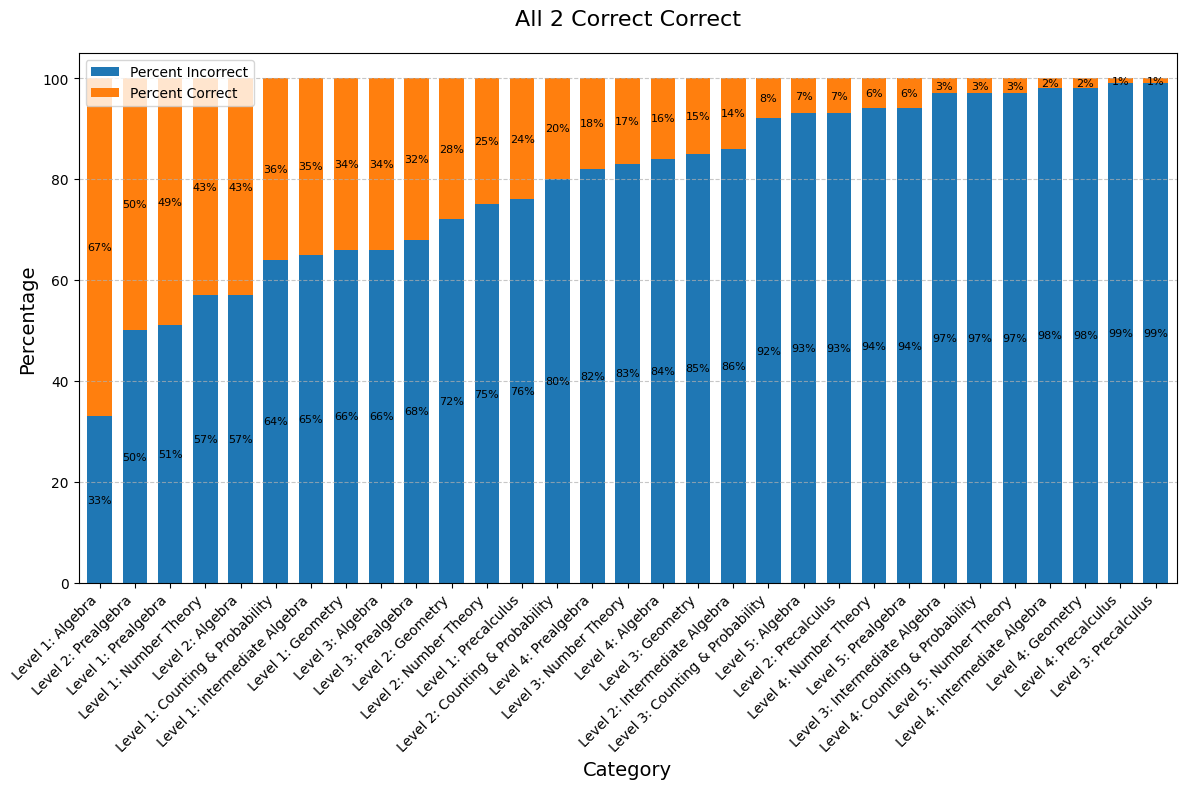

In [10]:
df = correct2
percent_incorrect = [float(p.strip('%')) for p in df["Total Incorrect"]]
percent_correct = [float(p.strip('%')) for p in df["Total Correct"]]
df["Percent Correct"] = percent_correct
df["Percent Incorrect"] = percent_incorrect
df = df[["Level:Type", "Percent Incorrect", "Percent Correct"]]

# Increase figure size and adjust spacing
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust width and height

# Plot stacked bar chart
df.plot.bar(x="Level:Type", stacked=True, ax=ax, width=0.7)  # Adjust width for spacing

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add bar labels for percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', size=8)

# Adjust title and axis labels for better readability
ax.set_title("All 2 Correct Correct", fontsize=16, pad=20)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_xlabel("Category", fontsize=14)

# Add grid for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

In [12]:
def get_competition_math_individual_breakdown_1correct():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]
    
    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["at_least_1_correct"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["at_least_1_correct"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))
        
        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Correct by 1 Models', 'Total Correct', 'Total Correct Raw', 'Question #s Incorrect',
    'Total Incorrect']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Correct Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Correct Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Correct Raw"])
    return individal_question_breakdown

correct1 = get_competition_math_individual_breakdown_1correct()
correct1

,Level:Type,Question #s Correct by 1 Models,Total Correct,Question #s Incorrect,Total Incorrect,Percent of Level:Type in Dataset
1,Level 1: Algebra,"1, 4, 13, 19, 24, 64, 70, 83, 84, 100, 102, 10...",92%,"65, 207, 235, 350, 466, 558, 583, 700, 755, 10...",8%,2.7
23,Level 1: Number Theory,"3051, 3054, 3103, 3140, 3150, 3187, 3190, 3211...",90%,"3263, 3383, 3452",10%,0.6
28,Level 1: Prealgebra,"3594, 3622, 3626, 3634, 3651, 3652, 3664, 3674...",81%,"3591, 3596, 3606, 3607, 3653, 3661, 3854, 3869...",19%,1.7
26,Level 2: Prealgebra,"3584, 3602, 3616, 3619, 3630, 3636, 3646, 3654...",81%,"3597, 3605, 3617, 3641, 3647, 3660, 3697, 3704...",19%,3.5
4,Level 2: Algebra,"5, 12, 16, 22, 41, 42, 44, 72, 79, 86, 94, 96,...",80%,"67, 76, 82, 168, 175, 187, 219, 289, 311, 361,...",20%,4.0
5,Level 1: Counting & Probability,"1187, 1223, 1273, 1280, 1282, 1283, 1300, 1318...",74%,"1197, 1208, 1262, 1325, 1510, 1528, 1562, 1577...",26%,0.8
0,Level 3: Algebra,"0, 18, 23, 31, 35, 45, 47, 53, 58, 59, 60, 71,...",72%,"14, 17, 30, 49, 52, 55, 123, 141, 153, 164, 17...",28%,5.2
29,Level 3: Prealgebra,"3592, 3593, 3595, 3614, 3621, 3623, 3624, 3625...",69%,"3598, 3600, 3609, 3639, 3644, 3667, 3684, 3706...",31%,4.5
19,Level 1: Intermediate Algebra,"2157, 2172, 2245, 2268, 2289, 2337, 2348, 2371...",67%,"2186, 2206, 2244, 2258, 2411, 2473, 2483, 2715...",33%,1.0
20,Level 2: Number Theory,"3045, 3060, 3082, 3115, 3124, 3162, 3188, 3192...",65%,"3043, 3049, 3098, 3221, 3230, 3236, 3244, 3276...",35%,1.8


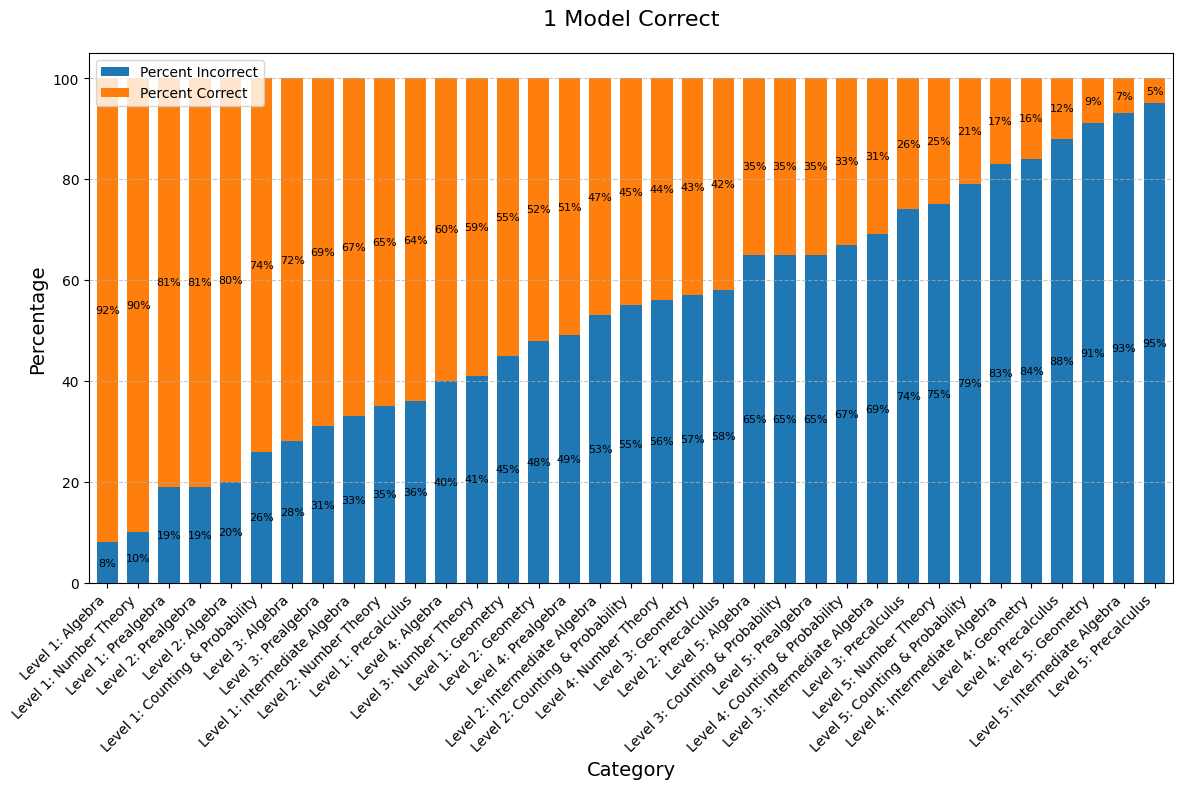

In [35]:
df = correct1
percent_incorrect = [float(p.strip('%')) for p in df["Total Incorrect"]]
percent_correct = [float(p.strip('%')) for p in df["Total Correct"]]
df["Percent Correct"] = percent_correct
df["Percent Incorrect"] = percent_incorrect
df = df[["Level:Type", "Percent Incorrect", "Percent Correct"]]

# Increase figure size and adjust spacing
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust width and height

# Plot stacked bar chart
df.plot.bar(x="Level:Type", stacked=True, ax=ax, width=0.7)  # Adjust width for spacing

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add bar labels for percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', size=8)

# Adjust title and axis labels for better readability
ax.set_title("1 Model Correct", fontsize=16, pad=20)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_xlabel("Category", fontsize=14)

# Add grid for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

In [52]:
def get_competition_math_individual_breakdown_llama():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]
    
    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["llama3_is_correct"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["llama3_is_correct"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))
        
        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Correct by Llama Models', 'Total Correct', 'Total Correct Raw', 'Question #s Incorrect',
    'Total Incorrect']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Correct Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Correct Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Correct Raw"])
    return individal_question_breakdown

llama_correct = get_competition_math_individual_breakdown_llama()


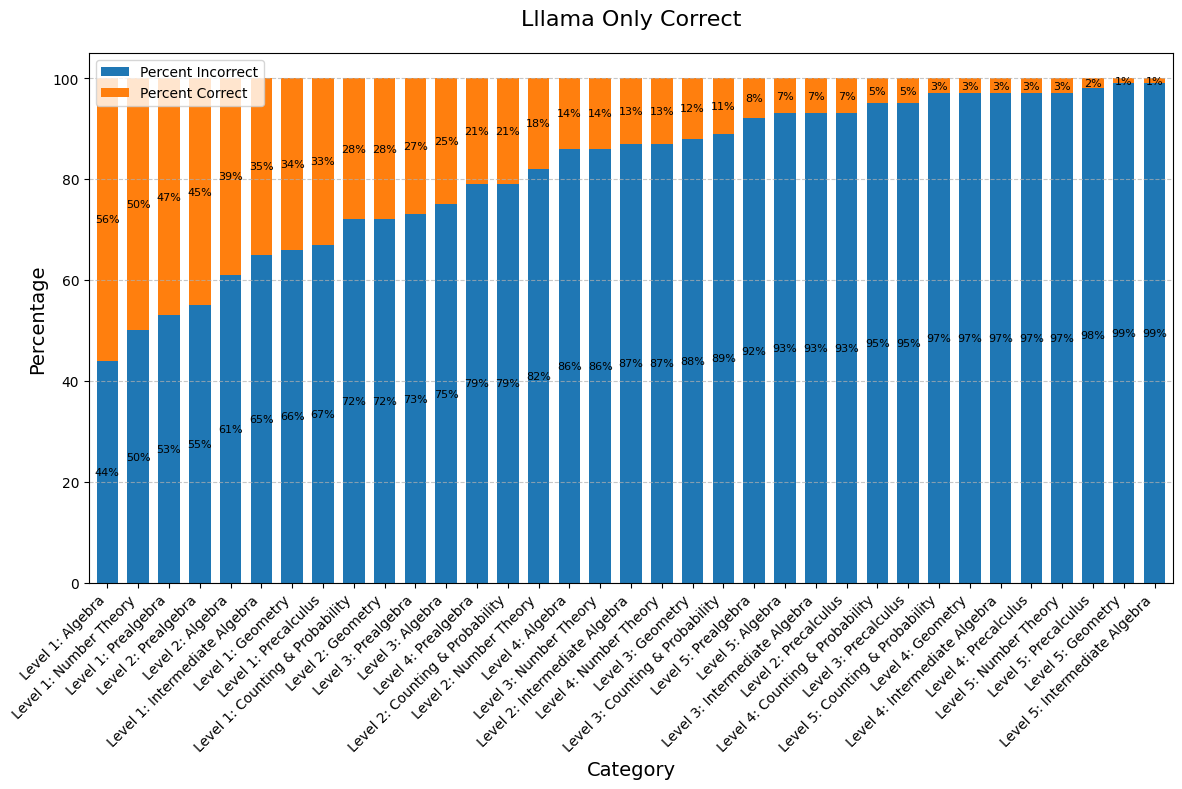

In [55]:
df = llama_correct
percent_incorrect = [float(p.strip('%')) for p in df["Total Incorrect"]]
percent_correct = [float(p.strip('%')) for p in df["Total Correct"]]
df["Percent Correct"] = percent_correct
df["Percent Incorrect"] = percent_incorrect
df = df[["Level:Type", "Percent Incorrect", "Percent Correct"]]

# Increase figure size and adjust spacing
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust width and height

# Plot stacked bar chart
df.plot.bar(x="Level:Type", stacked=True, ax=ax, width=0.7)  # Adjust width for spacing

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add bar labels for percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', size=8)

# Adjust title and axis labels for better readability
ax.set_title("Lllama Only Correct", fontsize=16, pad=20)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_xlabel("Category", fontsize=14)

# Add grid for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

In [57]:
def get_competition_math_individual_breakdown_llema():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]
    
    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["llema_is_correct"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["llema_is_correct"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))
        
        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Correct by Llama Models', 'Total Correct', 'Total Correct Raw', 'Question #s Incorrect',
    'Total Incorrect']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Correct Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Correct Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Correct Raw"])
    return individal_question_breakdown

llema_correct = get_competition_math_individual_breakdown_llema()


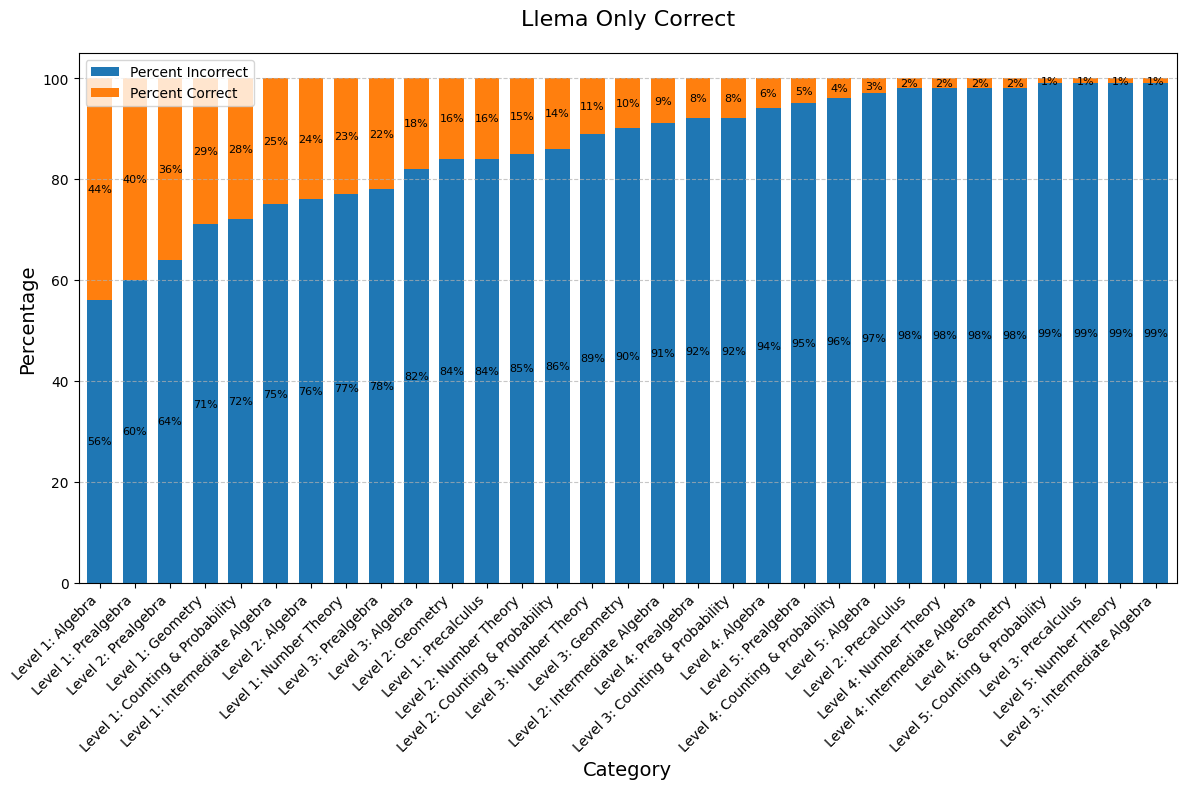

In [58]:
df = llema_correct
percent_incorrect = [float(p.strip('%')) for p in df["Total Incorrect"]]
percent_correct = [float(p.strip('%')) for p in df["Total Correct"]]
df["Percent Correct"] = percent_correct
df["Percent Incorrect"] = percent_incorrect
df = df[["Level:Type", "Percent Incorrect", "Percent Correct"]]

# Increase figure size and adjust spacing
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust width and height

# Plot stacked bar chart
df.plot.bar(x="Level:Type", stacked=True, ax=ax, width=0.7)  # Adjust width for spacing

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add bar labels for percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', size=8)

# Adjust title and axis labels for better readability
ax.set_title("Llema Only Correct", fontsize=16, pad=20)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_xlabel("Category", fontsize=14)

# Add grid for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

In [60]:
def get_competition_math_individual_breakdown_qwen():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]
    
    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["qwen_is_correct"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["qwen_is_correct"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))
        
        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Correct by Llama Models', 'Total Correct', 'Total Correct Raw', 'Question #s Incorrect',
    'Total Incorrect']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Correct Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Correct Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Correct Raw"])
    return individal_question_breakdown

qwen_correct = get_competition_math_individual_breakdown_qwen()


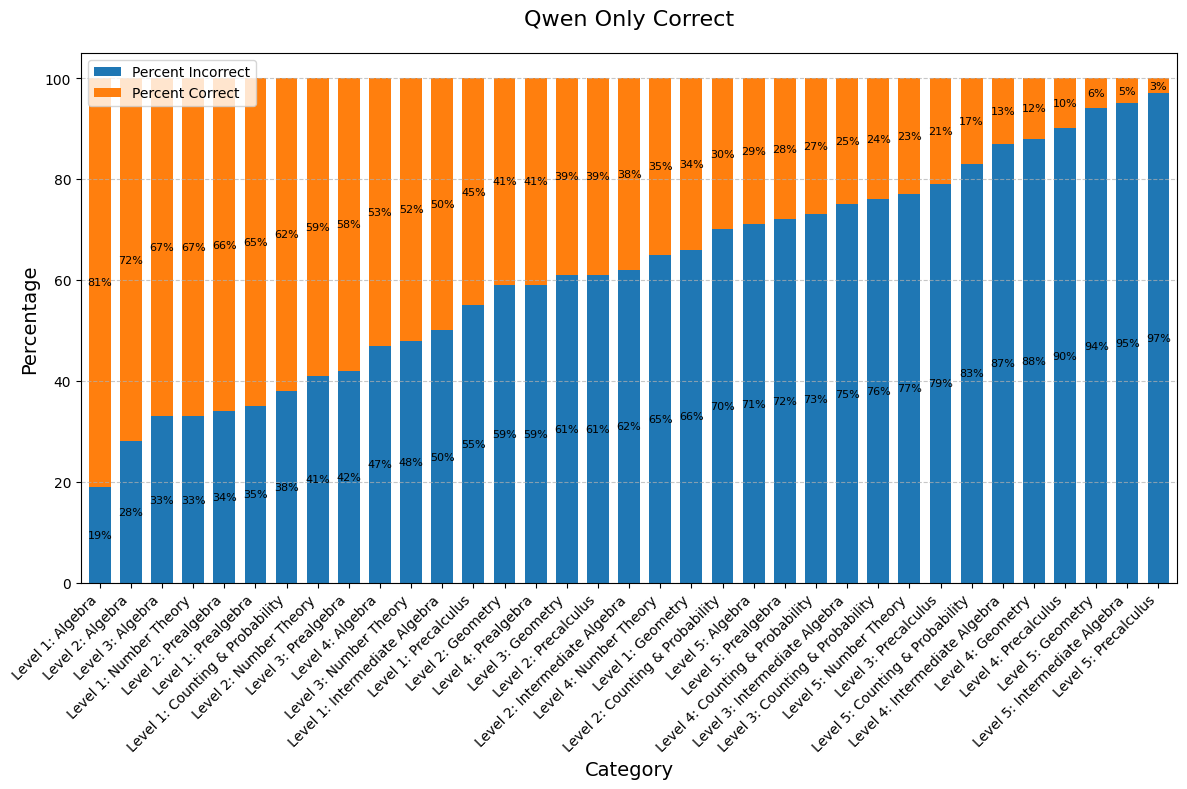

In [61]:
df = qwen_correct
percent_incorrect = [float(p.strip('%')) for p in df["Total Incorrect"]]
percent_correct = [float(p.strip('%')) for p in df["Total Correct"]]
df["Percent Correct"] = percent_correct
df["Percent Incorrect"] = percent_incorrect
df = df[["Level:Type", "Percent Incorrect", "Percent Correct"]]

# Increase figure size and adjust spacing
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust width and height

# Plot stacked bar chart
df.plot.bar(x="Level:Type", stacked=True, ax=ax, width=0.7)  # Adjust width for spacing

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add bar labels for percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', size=8)

# Adjust title and axis labels for better readability
ax.set_title("Qwen Only Correct", fontsize=16, pad=20)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_xlabel("Category", fontsize=14)

# Add grid for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

In [62]:
def get_competition_math_individual_breakdown_mistral():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]
    
    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["mistral_is_correct"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["mistral_is_correct"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))
        
        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions)) 


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Correct by Llama Models', 'Total Correct', 'Total Correct Raw', 'Question #s Incorrect',
    'Total Incorrect']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Correct Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Correct Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Correct Raw"])
    return individal_question_breakdown

mistral_correct = get_competition_math_individual_breakdown_mistral()


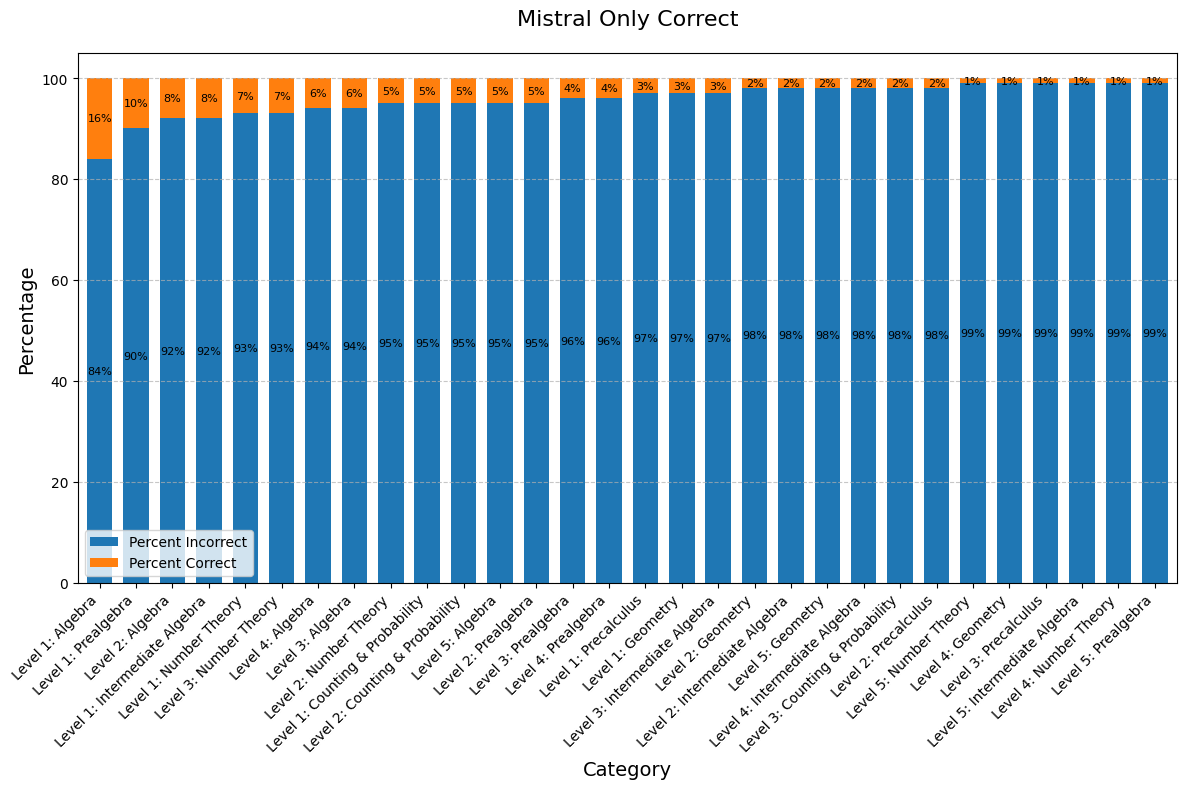

In [63]:
df = mistral_correct
percent_incorrect = [float(p.strip('%')) for p in df["Total Incorrect"]]
percent_correct = [float(p.strip('%')) for p in df["Total Correct"]]
df["Percent Correct"] = percent_correct
df["Percent Incorrect"] = percent_incorrect
df = df[["Level:Type", "Percent Incorrect", "Percent Correct"]]

# Increase figure size and adjust spacing
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust width and height

# Plot stacked bar chart
df.plot.bar(x="Level:Type", stacked=True, ax=ax, width=0.7)  # Adjust width for spacing

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add bar labels for percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', size=8)

# Adjust title and axis labels for better readability
ax.set_title("Mistral Only Correct", fontsize=16, pad=20)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_xlabel("Category", fontsize=14)

# Add grid for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()